# Table of Contents
***

## Introduction to Linear Regression
- [What is Linear Regression? Why?](#Ensemble)
    
- [How it Works](#school_attendance)
    
- [Advantages and Disadvantages](#school_attendance)
    
- [Statistical Modeling vs Predictive Modeling](#hi)

## Important Terminologies
- [Independent Variables](#iv)

- [Dependent Variable](#dv)

- [Intercept](#int)

- [Coefficients](#coef)

- [Error Term](#error)

- [Residual](#res)

- [Ordinary Least Squares (OLS)](#ols)


## Assumptions & How to Check
- [Linear Relationship between IV and DV](#DV)

- [Multicollinearity](#mc)

- [Heteroskedasticity](#hetero)

- [Normal Distribution of Residuals](#nr)


## How to Interpret Linear Regression Output (Statsmodel)
- [R Squared (SSR,SSE,SSTO)](#r2)

- [Adjusted R Squared](#r22)

- [Intercept and Coefficients](#coeff)

- [Null-Hypothesis and P-value](#p)

## Modeling
- [Simple Linear Regresssion](#sl)

- [Multiple Linear Regression](#ml)

- [Polynomial Regression](#pol)

- [Regularized Linear Regression (L1 & L2)](#l1)

<img src='https://cdn-images-1.medium.com/max/1000/1*csk8XTXy0j__hm_kbkwxCw.jpeg'/>

### Linear Regression 

Linear Regression is a method to model the **relationship** between a set of **independent variables $X$** (also knowns as explanatory variables, features, predictors) and a **dependent variable $Y$**.


### Formula

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

**What does each term mean?**

- Y is the response
- X is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for X
- $\epsilon$ is the error term

$\beta_0$ and $\beta_1$ are called the **model coefficients**

### Goal 
To build a model which predicts “y” given “x”


In [1]:
# Import Libraries 
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
import seaborn as sns #sets up styles and gives us more plotting options
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [62]:
# read data into a DataFrame
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


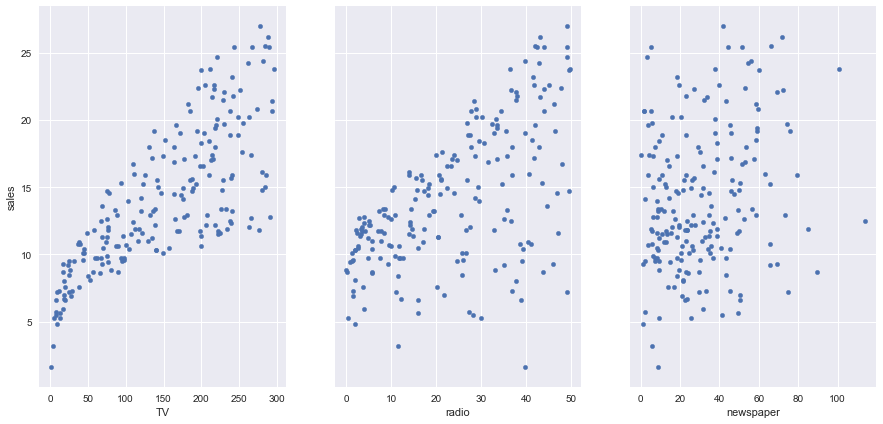

In [66]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(15, 7))
df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

# Ordinary Least Squares

Finding the model coefficients

<img src='http://i63.tinypic.com/33l1o4w.png'/>

# Simple Linear Regression

In [4]:
# Import Linear Regression Model
from sklearn.linear_model import LinearRegression

In [5]:
# Use a single variable 
simple = df[['sqft_living']]

### Train/Test Split

In [6]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(simple, y, test_size=0.20, random_state=42)

In [7]:
# Initialize LR Model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions
predictions = lr.predict(X_test)

In [8]:
coefficients = pd.DataFrame(lr.coef_, simple.columns).sort_values(by=0, ascending=False)
print(coefficients)

                      0
sqft_living  279.554779


In [9]:
# Store results in variable
r2 = format(r2_score(y_test, predictions),'.3f')
mse = format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f')
mae = format(mean_absolute_error(y_test, predictions),'.3f')

# Print out result
print("R Squared Score: ", format(r2_score(y_test, predictions),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test, predictions),'.3f'))

R Squared Score:  0.494
Root Mean Squared Error:  276559.175
Mean Absolute Error:  177867.540


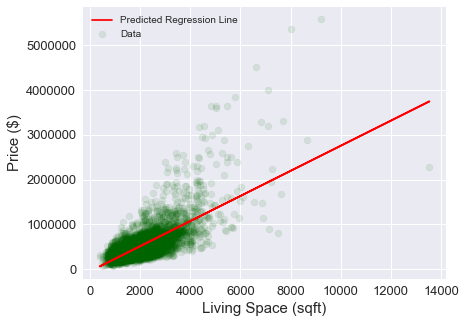

In [10]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Result

In [11]:
result = pd.DataFrame.from_dict({'Model':['Simple'],'R Squared':[r2], 'MSE':[mse], 'MAE':[mae]})
result

,MAE,MSE,Model,R Squared
0,177867.540,276559.175,Simple,0.494


# Multiple Linear Regression

In [12]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state=42)

In [13]:
# Initialize LR Model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions
predictions = lr.predict(X_test)

In [14]:
coefficients = pd.DataFrame(lr.coef_, df.columns).sort_values(by=0, ascending=False)
print(coefficients)

                           0
waterfront     568137.383420
lat            556748.027154
grade           95702.362583
view            50499.184619
bathrooms       45532.714991
condition       28786.278381
floors           1478.801644
sqft_living       107.507563
sqft_above         70.056145
sqft_basement      37.451418
sqft_living15      26.680621
yr_renovated       22.066766
sqft_lot            0.084676
sqft_lot15         -0.330561
yr_built        -2531.973870
bedrooms       -32808.988291
long          -101603.032397


In [15]:
r2 = format(r2_score(y_test, predictions),'.3f')
mse = format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f')
mae = format(mean_absolute_error(y_test, predictions),'.3f')

print("R Squared Score: ", format(r2_score(y_test, predictions),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test, predictions),'.3f'))

R Squared Score:  0.696
Root Mean Squared Error:  214472.756
Mean Absolute Error:  128157.320


In [16]:
result_2 = pd.DataFrame({'Model':['Multiple'],'R Squared':[r2], 'MSE':[mse], 'MAE':[mae]})
result = result.append(result_2)
result

,MAE,MSE,Model,R Squared
0,177867.540,276559.175,Simple,0.494
0,128157.320,214472.756,Multiple,0.696


# Ridge Regression

In [17]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(fit_intercept=True)
model_ridge.fit(X_train, y_train)
predictions = model_ridge.predict(X_test)

In [18]:
coefficients = pd.DataFrame(model_ridge.coef_, df.columns).sort_values(by=0, ascending=False)
print(coefficients)

                           0
waterfront     562674.439585
lat            554826.737057
grade           95748.598882
view            50711.007658
bathrooms       45540.098253
condition       28748.671127
floors           1575.594342
sqft_living       107.536692
sqft_above         70.023647
sqft_basement      37.510548
sqft_living15      26.646653
yr_renovated       22.088362
sqft_lot            0.084134
sqft_lot15         -0.330830
yr_built        -2535.414222
bedrooms       -32851.352110
long          -101271.051775


In [19]:
r2 = format(r2_score(y_test, predictions),'.3f')
mse = format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f')
mae = format(mean_absolute_error(y_test, predictions),'.3f')

print("R Squared Score: ", format(r2_score(y_test, predictions),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test, predictions),'.3f'))

R Squared Score:  0.696
Root Mean Squared Error:  214494.816
Mean Absolute Error:  128155.039


In [20]:
result_2 = pd.DataFrame({'Model':['Ridge'],'R Squared':[r2], 'MSE':[mse], 'MAE':[mae]})
result = result.append(result_2)
result

,MAE,MSE,Model,R Squared
0,177867.540,276559.175,Simple,0.494
0,128157.320,214472.756,Multiple,0.696
0,128155.039,214494.816,Ridge,0.696


# LASSO

In [44]:
from sklearn.linear_model import Lasso
lasso = Lasso(fit_intercept=True)
lasso = lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [45]:
coefficients = pd.DataFrame(lasso.coef_, df.columns).sort_values(by=0, ascending=False)
print(coefficients)

                           0
waterfront     567977.946101
lat            556692.670680
grade           95704.740685
view            50505.133777
bathrooms       45529.509541
condition       28781.623439
floors           1479.441971
sqft_living       277.663699
sqft_living15      26.676006
yr_renovated       22.067118
sqft_lot            0.084636
sqft_lot15         -0.330602
sqft_above       -100.099218
sqft_basement    -132.698412
yr_built        -2532.149027
bedrooms       -32808.394353
long          -101535.683965


In [48]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [49]:
r2 = format(r2_score(y_test, predictions),'.3f')
mse = format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f')
mae = format(mean_absolute_error(y_test, predictions),'.3f')

print("R Squared Score: ", format(r2_score(y_test, predictions),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test, predictions),'.3f'))

R Squared Score:  0.696
Root Mean Squared Error:  214473.711
Mean Absolute Error:  128157.165


In [52]:
adjustedR2(r2_score(y_test, predictions),len(y), len(X_train.columns))

0.69550169608848811

In [35]:
result_2 = pd.DataFrame({'Model':['LASSO'],'R Squared':[r2], 'MSE':[mse], 'MAE':[mae]})
result = result.append(result_2)
result

,MAE,MSE,Model,R Squared
0,177867.540,276559.175,Simple,0.494
0,128157.320,214472.756,Multiple,0.696
0,128155.039,214494.816,Ridge,0.696
0,128157.165,214473.711,LASSO,0.696
0,107917.008,182896.629,Polynomial,0.779
0,128157.243,214473.233,LASSO,0.696
0,128157.165,214473.711,LASSO,0.696


# Polynomial Regression

In [56]:
polyfeat = PolynomialFeatures(degree=2)
X_trainpoly = polyfeat.fit_transform(X_train)
X_testpoly = polyfeat.fit_transform(X_test)
poly = LinearRegression().fit(X_trainpoly, y_train)

predp = poly.predict(X_testpoly)

In [57]:
r2 = format(r2_score(y_test, predp),'.3f')
mse = format(np.sqrt(mean_squared_error(y_test, predp)),'.3f')
mae = format(mean_absolute_error(y_test, predp),'.3f')

print("R Squared Score: ", format(r2_score(y_test, predp),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test, predp)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test, predp),'.3f'))

R Squared Score:  0.779
Root Mean Squared Error:  182896.629
Mean Absolute Error:  107917.008


In [59]:
adjustedR2(r2_score(y_test, predp),len(y), len(X_train.columns))

0.77856404065398388

In [27]:
result_2 = pd.DataFrame({'Model':['Polynomial'],'R Squared':[r2], 'MSE':[mse], 'MAE':[mae]})
result = result.append(result_2)
result

,MAE,MSE,Model,R Squared
0,177867.540,276559.175,Simple,0.494
0,128157.320,214472.756,Multiple,0.696
0,128155.039,214494.816,Ridge,0.696
0,128157.165,214473.711,LASSO,0.696
0,107917.008,182896.629,Polynomial,0.779
